In [1]:
from imblearn.over_sampling import SMOTE
from torchvision import datasets, transforms, models
import os
import pandas as pd
from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from tqdm import tqdm
import numpy as np

In [2]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

# Reading data

In [2]:
path = 'data/train'

In [5]:
def get_data(fulldir):
    classes = os.listdir(fulldir)
    classes.remove('.DS_Store')
    classes.sort()
    class_to_idx = dict(zip(classes, range(len(classes)))) 
    idx_to_class = {v:k for k,v in class_to_idx.items()}
    resizer =  transforms.Resize((324,324))
    convert_tensor = transforms.ToTensor()
    X = []
    y = []
    for i, label in idx_to_class.items():
        path = fulldir+"/"+label
        for file in tqdm(os.listdir(path)):
            X.append(np.array(Image.open(path+'/'+file).convert('RGB')))
            y.append(i)
    
    return np.concatenate(X, axis=1),y, class_to_idx, idx_to_class
X,y, class_to_idx, idx_to_class = get_data(path)

100%|██████████| 385/385 [00:05<00:00, 70.13it/s]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 352 and the array at index 1 has size 906

In [3]:
path = 'data/train'
fulldir = path
classes = os.listdir(fulldir)
classes.remove('.DS_Store')
classes.sort()
class_to_idx = dict(zip(classes, range(len(classes)))) 
idx_to_class = {v:k for k,v in class_to_idx.items()}
resizer =  transforms.Resize((324,324))
convert_tensor = transforms.ToTensor()
X = []
y = []
for i, label in idx_to_class.items():
    path = fulldir+"/"+label
    for file in tqdm(os.listdir(path)):
        X.append(torch.unsqueeze(convert_tensor(resizer(Image.open(path+'/'+file).convert('RGB'))),0))
        y.append(i)

100%|██████████| 385/385 [00:06<00:00, 61.41it/s]


In [4]:
X = torch.cat(X,dim=0)
X.shape

torch.Size([4750, 3, 324, 324])

In [6]:
class PlantDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.transform = transform
        self.df = dataframe
        self.root_dir = root_dir
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        fullpath = os.path.join(self.root_dir, self.df.iloc[idx][0])
        image = Image.open(fullpath).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, self.df.iloc[idx][2]

In [7]:
X_train, X_val = train_test_split(df,test_size=0.2, random_state=42,stratify=df['class_index'])
train_dataset = PlantDataset(X_train,path)
val_dataset = PlantDataset(X_val,path)

In [8]:
X_train.iloc[:4]['file'].values#.reshape(4, 3*324*324)

array([list([array([[117, 117, 117],
       [113, 112, 113],
       [116, 114, 115],
       ...,
       [ 78,  71,  67],
       [ 80,  75,  71],
       [ 72,  68,  64]], dtype=uint8), array([[116, 117, 117],
       [118, 117, 118],
       [117, 115, 116],
       ...,
       [ 79,  71,  68],
       [ 78,  72,  68],
       [ 75,  71,  67]], dtype=uint8), array([[116, 117, 116],
       [117, 117, 116],
       [118, 116, 116],
       ...,
       [ 78,  71,  67],
       [ 78,  72,  68],
       [ 76,  71,  68]], dtype=uint8), array([[119, 121, 118],
       [117, 118, 115],
       [117, 115, 113],
       ...,
       [ 77,  70,  66],
       [ 76,  71,  66],
       [ 76,  71,  67]], dtype=uint8), array([[115, 116, 113],
       [121, 121, 117],
       [119, 118, 114],
       ...,
       [ 77,  72,  66],
       [ 77,  72,  67],
       [ 76,  71,  66]], dtype=uint8), array([[109, 109, 105],
       [116, 116, 111],
       [129, 127, 123],
       ...,
       [ 80,  76,  69],
       [ 77,  72,  66],


In [95]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train['file'].values.reshape(-1), X_train['class_index'])

ValueError: only one element tensors can be converted to Python scalars

In [47]:
convert_tensor = transforms.ToTensor()
resizer =  transforms.Resize((324,324))

convert_tensor(resizer(Image.open(os.path.join(path, X_train.iloc[0][0])).convert('RGB'))).shape


torch.Size([3, 324, 324])

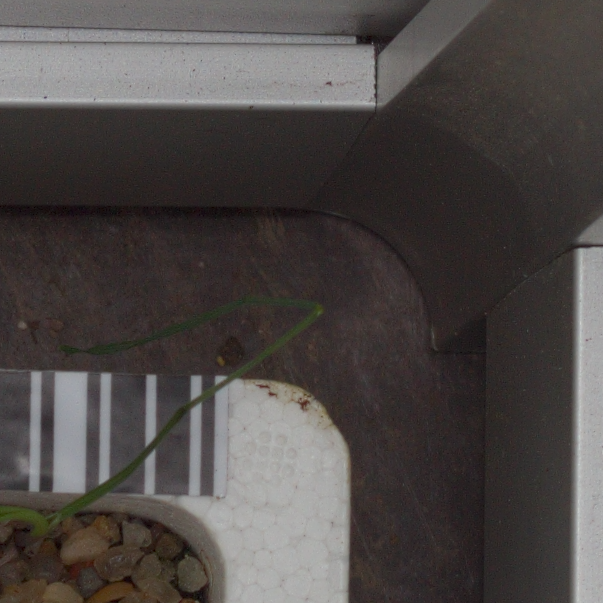

In [46]:
Image.open(os.path.join(path, X_train.iloc[0][0])).convert('RGB')